### 开运算

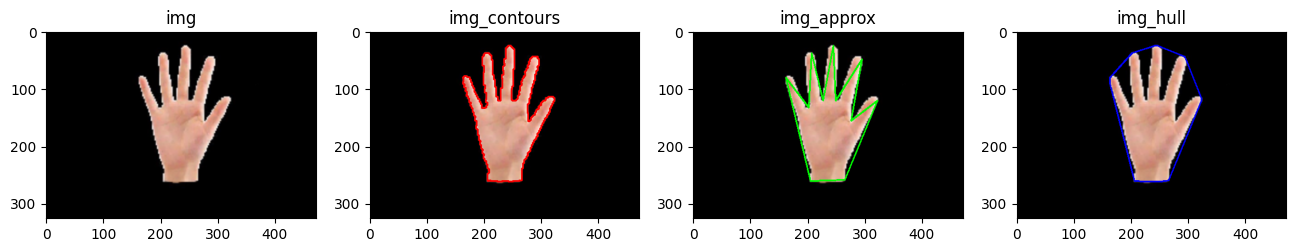

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img = cv2.imread('./hand.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,binary= cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# 查找轮廓并画出，contours[0]是手的轮廓
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
cv2.drawContours(img_contours, contours, 0, (0, 0, 255), 2)

# 进行多边形逼近, 返回的是多边形上一系列的点, 即多边形逼近之后的轮廓
# 凸包和多边形都可以使用drawContours函数绘制，只是其接受的是轮廓列表格式
approx = cv2.approxPolyDP(contours[0], 20, True)
img_approx=img.copy()
cv2.drawContours(img_approx, [approx], 0, (0, 255, 0), 2)

# 计算凸包
hull = cv2.convexHull(contours[0])
img_hull=img.copy()
cv2.drawContours(img_hull, [hull], 0, (255, 0, 0), 2)

plt.figure(figsize=[16,8])
plt.subplot(141); plt.imshow(img[:,:,::-1]);  plt.title("img");
plt.subplot(142); plt.imshow(img_contours[:,:,::-1]);  plt.title("img_contours");
plt.subplot(143); plt.imshow(img_approx[:,:,::-1]);  plt.title("img_approx");
plt.subplot(144); plt.imshow(img_hull[:,:,::-1]);  plt.title("img_hull");

In [1]:
import cv2 
import numpy as np

# 开运算 = 腐蚀  + 膨胀
# 开运算提供了另一种去除噪声的思路.
img = cv2.imread('./dotj.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# # 先腐蚀
# dst = cv2.erode(img, kernel, iterations=2)

# # 膨胀
# dst = cv2.dilate(dst, kernel, iterations=2)

# 调用opencv提供的api
dst = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

### 闭运算= 膨胀 + 腐蚀

In [2]:
import cv2 
import numpy as np

# 闭运算= 膨胀 + 腐蚀
# 闭运算可以去除图形内部的噪声
# imread没有读到东西是不会报错的, 只会返回一个None
img = cv2.imread('./dotinj.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


# 调用opencv提供的api
dst = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学梯度

In [3]:
# 形态学梯度 = 原图 - 腐蚀
import cv2 
import numpy as np

img = cv2.imread('./j.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


# 调用opencv提供的api
dst = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel, iterations=1)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

### 顶帽操作(tophat)

In [4]:
# 顶帽操作 = 原图  - 开运算 得到图形外的噪声
import cv2 
import numpy as np

img = cv2.imread('./dotj.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


# 调用opencv提供的api
dst = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=2)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

### 黑帽操作


In [5]:
# 黑帽操作 = 原图  - 闭运算 得到图形内部的噪声
import cv2 
import numpy as np

img = cv2.imread('./dotinj.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


# 调用opencv提供的api
dst = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel, iterations=2)

cv2.imshow('img', np.hstack((img, dst)))

cv2.waitKey(0)
cv2.destroyAllWindows()

### 查找轮廓

In [6]:
import cv2 
import numpy as np

# 该图形显示是黑白的,但是实际上是3个通道的彩色图像
img = cv2.imread('./contours1.jpeg')

# print(img.shape)
# 先变成单通道的黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化, 返回两个东西, 一个阈值, 一个二值化之后的图.
thresh, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) 

# 查找轮廓, 新版本返回两个结果, 分别是轮廓和层级
result, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# contours是list 不是ndarray, 里面放的是ndarray, 每个ndarray表示一个contour
print(type(contours))
print(contours)
print(hierarchy)

# cv2.imshow('img', img)
# cv2.imshow('gray', gray)
# cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'list'>
[array([[[  0,   0]],

       [[  0, 435]],

       [[345, 435]],

       [[345,   0]]], dtype=int32), array([[[ 36, 130]],

       [[ 37, 129]],

       [[310, 129]],

       [[311, 130]],

       [[311, 400]],

       [[310, 401]],

       [[ 37, 401]],

       [[ 36, 400]]], dtype=int32), array([[[ 36,  35]],

       [[ 37,  34]],

       [[308,  34]],

       [[309,  35]],

       [[309,  39]],

       [[308,  40]],

       [[ 37,  40]],

       [[ 36,  39]]], dtype=int32)]
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [-1  1 -1  0]]]


### 绘制轮廓

In [7]:
import cv2 
import numpy as np

# 该图形显示是黑白的,但是实际上是3个通道的彩色图像
img = cv2.imread('./contours1.jpeg')

# print(img.shape)
# 先变成单通道的黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化, 返回两个东西, 一个阈值, 一个二值化之后的图.
thresh, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) 

# 查找轮廓, 新版本返回两个结果, 分别是轮廓和层级
result, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 绘制轮廓会直接修改原图.
# 如果想保持原图不变, 建议copy一份
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 1, (0, 0, 255), 2)

cv2.imshow('img', img)
cv2.imshow('img_copy', img_copy)
# cv2.imshow('gray', gray)
# cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 计算轮廓面积和周长

In [8]:
import cv2 
import numpy as np

# 该图形显示是黑白的,但是实际上是3个通道的彩色图像
img = cv2.imread('./contours1.jpeg')

# print(img.shape)
# 先变成单通道的黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化, 返回两个东西, 一个阈值, 一个二值化之后的图.
thresh, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) 

# 查找轮廓, 新版本返回两个结果, 分别是轮廓和层级
result, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 绘制轮廓会直接修改原图.
# 如果想保持原图不变, 建议copy一份
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 1, (0, 0, 255), 2)

# 计算轮廓面积
area = cv2.contourArea(contours[1])
print('area:', area)

# 计算轮廓周长
perimeter = cv2.arcLength(contours[1], closed=True)
print('perimeter:', perimeter)

cv2.imshow('img', img)
cv2.imshow('img_copy', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

area: 74798.0
perimeter: 1091.6568541526794


In [32]:
(821.6568/ 3) * 4

1095.5424

### 多边形逼近与凸包

In [13]:
## import cv2 
import numpy as np

# 该图形显示是黑白的,但是实际上是3个通道的彩色图像
img = cv2.imread('./hand.png')

# print(img.shape)
# 先变成单通道的黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化, 返回两个东西, 一个阈值, 一个二值化之后的图.
thresh, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY) 

# 查找轮廓, 新版本返回两个结果, 分别是轮廓和层级
result, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 绘制轮廓会直接修改原图.
# 如果想保持原图不变, 建议copy一份
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 0, (0, 0, 255), 2)

# 使用多边形逼近, 近似模拟手的轮廓
approx = cv2.approxPolyDP(contours[0], 20, closed=True)
# approx本质上就是一个轮廓数据
# print(type(approx))
# print(approx)
# print('--------------------')
# print(contours[0])
# 画出多边形逼近的轮廓
cv2.drawContours(img_copy, [approx], 0, (0, 255, 0), 2)

# cv2.imshow('img', img)
cv2.imshow('img_copy', img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
cv2.minEnclosingCircle??

Docstring:
minEnclosingCircle(points) -> center, radius
.   @brief Finds a circle of the minimum area enclosing a 2D point set.
.   
.   The function finds the minimal enclosing circle of a 2D point set using an iterative algorithm.
.   
.   @param points Input vector of 2D points, stored in std::vector\<\> or Mat
.   @param center Output center of the circle.
.   @param radius Output radius of the circle.
Type:      builtin_function_or_method

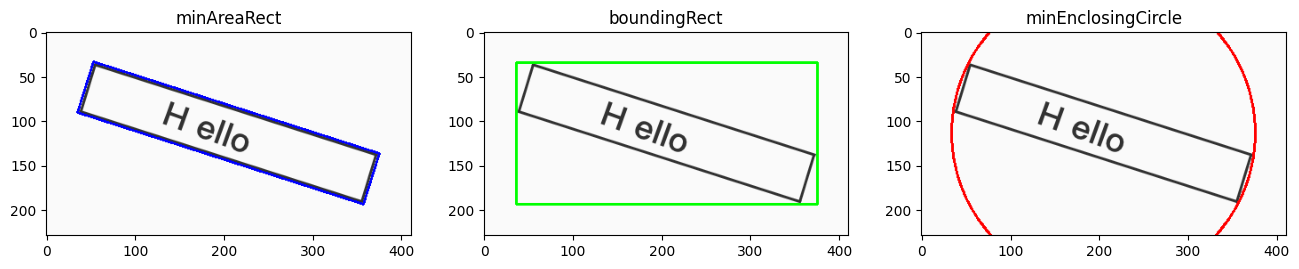

In [18]:
img = cv2.imread('./hello.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
contours,_= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 最外面的轮廓是整个图像, contours[1]才是Hello语的轮廓
# rect是一个元组，包括(x, y), (w, h), angle
rect = cv2.minAreaRect(contours[1])
# 快速把r转化为轮廓数据，得到的结果是浮点类型
box = cv2.boxPoints(rect)
box = np.round(box).astype('int64')

# 绘制最小外接矩形
img1=img.copy()
cv2.drawContours(img1, [box], 0, (255, 0, 0), thickness=2)

# 绘制最大外接矩形
x,y, w, h = cv2.boundingRect(contours[1])
img2=img.copy()
cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)

# 绘制最小外接圆,返回的也是浮点类型
center, radius=cv2.minEnclosingCircle(contours[1])
center, radius= np.round(center).astype('int64'),np.round(radius).astype('int64')
img3=img.copy()
cv2.circle(img3,center,radius,(0, 0, 255),thickness=2) 

plt.figure(figsize=[16,8])
#plt.subplot(141); plt.imshow(img[:,:,::-1]);  plt.title("img");
plt.subplot(131); plt.imshow(img1[:,:,::-1]);  plt.title("minAreaRect");
plt.subplot(132); plt.imshow(img2[:,:,::-1]);  plt.title("boundingRect");
plt.subplot(133); plt.imshow(img3[:,:,::-1]);  plt.title("minEnclosingCircle");

In [16]:
img = cv2.imread('./hello.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
contours,_= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
center, radius=cv2.minEnclosingCircle(contours[1])
center, radius= np.round(center).astype('int64'),np.round(radius).astype('int64')
center,radius

(array([205, 114], dtype=int64), 171)